### Install Required Libraries

In [ ]:
%pip install yfinance
%pip install matplotlib
%pip install seaborn


### Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

### Define Functions

In [3]:
def fetch_spy_data(date):
    """Fetch SPY data for 7 days after the given date."""
    spy = yf.Ticker("SPY")
    spy_date = date + timedelta(days=7)
    start_date = spy_date - timedelta(days=2)  # To get previous day's data
    end_date = spy_date + timedelta(days=1)
    
    # Fetch historical data for SPY
    spy_data = spy.history(start=start_date, end=end_date)
    
    if len(spy_data) >= 2:
        spy_today = spy_data.iloc[-1]
        spy_yesterday = spy_data.iloc[-2]
        
        spy_price = spy_today['Close']
        spy_volume = spy_today['Volume']
        spy_change = (spy_today['Close'] - spy_yesterday['Close']) / spy_yesterday['Close'] * 100
        
        return spy_price, spy_volume, spy_change
    else:
        return None, None, None

def concatenate_headlines(headlines):
    """Concatenate headlines from multiple sources."""
    return ' '.join(headlines)

def custom_headlines_function(date, df):
    """Fetch headlines from the DataFrame for the given date."""
    date_str = date.strftime('%Y-%m-%d')
    headlines = df[df['date'] == date_str]['headlines'].tolist()
    return headlines

def collect_data(start_date, end_date, headlines_df):
    """Collect dataset entries for the given date range."""
    current_date = start_date
    dataset = []
    
    while current_date <= end_date:
        # Fetch headlines from the DataFrame
        headlines = custom_headlines_function(current_date, headlines_df)
        concatenated_headlines = concatenate_headlines(headlines)
        
        # Fetch SPY data
        spy_price, spy_volume, spy_change = fetch_spy_data(current_date)
        
        if spy_price is not None:
            dataset.append({
                'Date': current_date.strftime('%Y-%m-%d'),
                'Concatenated Headlines': concatenated_headlines,
                'SPY Date': (current_date + timedelta(days=7)).strftime('%Y-%m-%d'),
                'SPY Price': spy_price,
                'SPY Volume': spy_volume,
                'SPY Change': spy_change
            })
        
        # Move to the next date
        current_date += timedelta(days=1)
    
    return pd.DataFrame(dataset)

### Load Headlines Data

In [4]:
# Load the CSV file containing headlines and dates
headlines_df = pd.read_csv('../data/combined_headlines_new.csv')

# Ensure the 'Date' column is of datetime type
headlines_df['date'] = pd.to_datetime(headlines_df['date'])

### Define Date Range and Collect Data

In [ ]:
# Define the date range for data collection
start_date = datetime(2018, 3, 20)
end_date = datetime(2020, 7, 17)

# Collect data
data_df = collect_data(start_date, end_date, headlines_df)

# Save the data to a CSV file
data_df.to_csv('../data/patricko_data_prep.csv', index=False)

### Visualization Section

### Plot 1: SPY Price Over Time

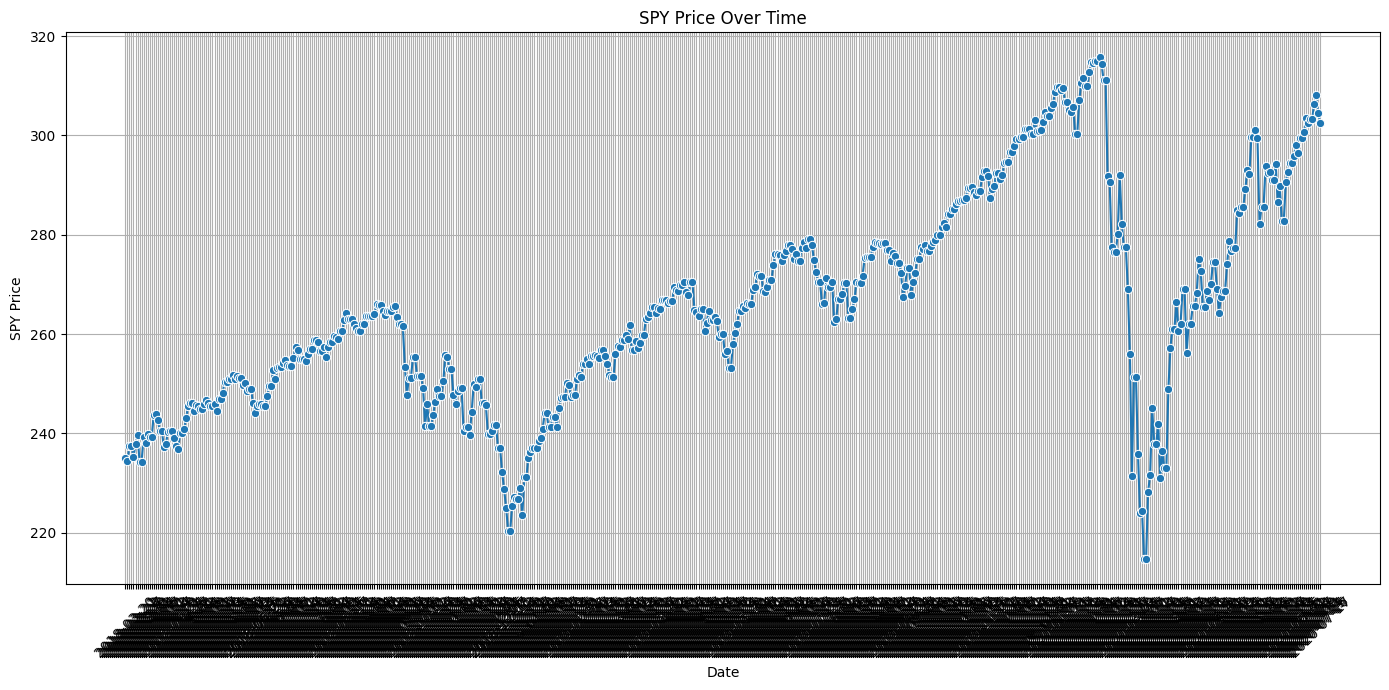

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_df, x='Date', y='SPY Price', marker='o')
plt.title('SPY Price Over Time')
plt.xlabel('Date')
plt.ylabel('SPY Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 2: SPY Volume Over Time

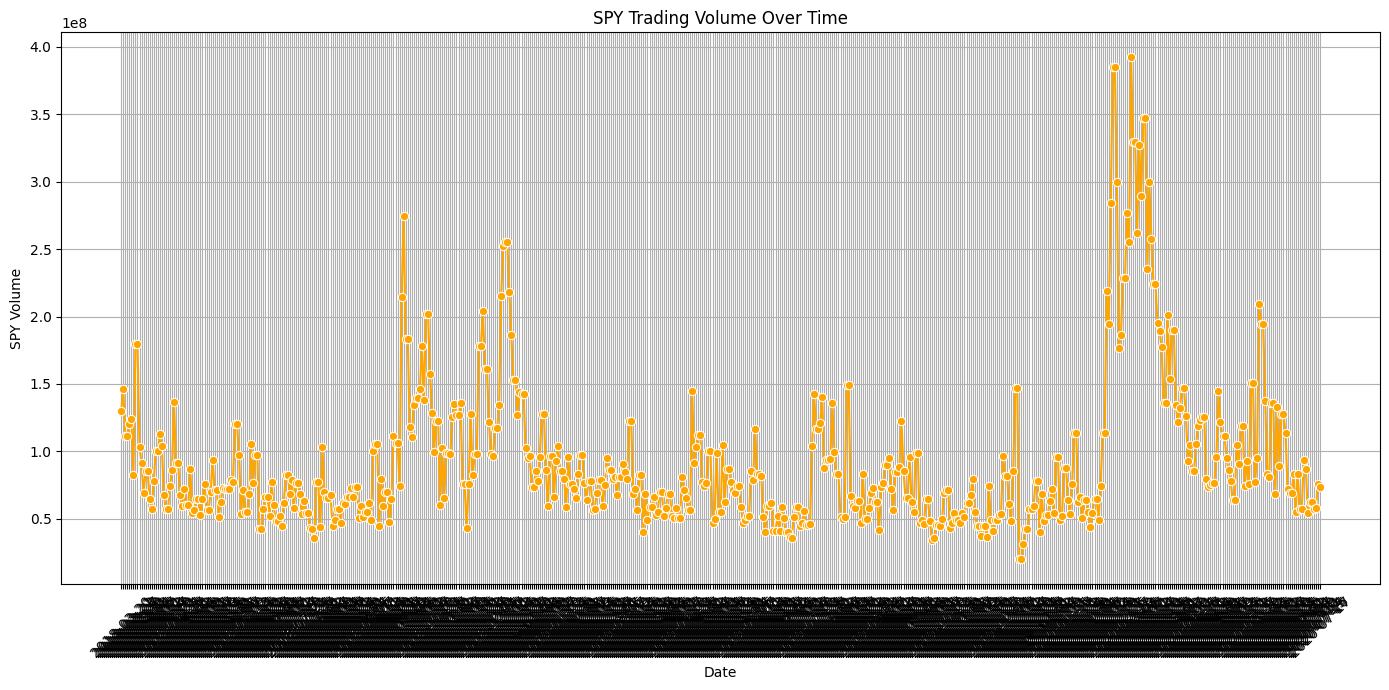

In [7]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_df, x='Date', y='SPY Volume', marker='o', color='orange')
plt.title('SPY Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('SPY Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 3: SPY Change Over Time

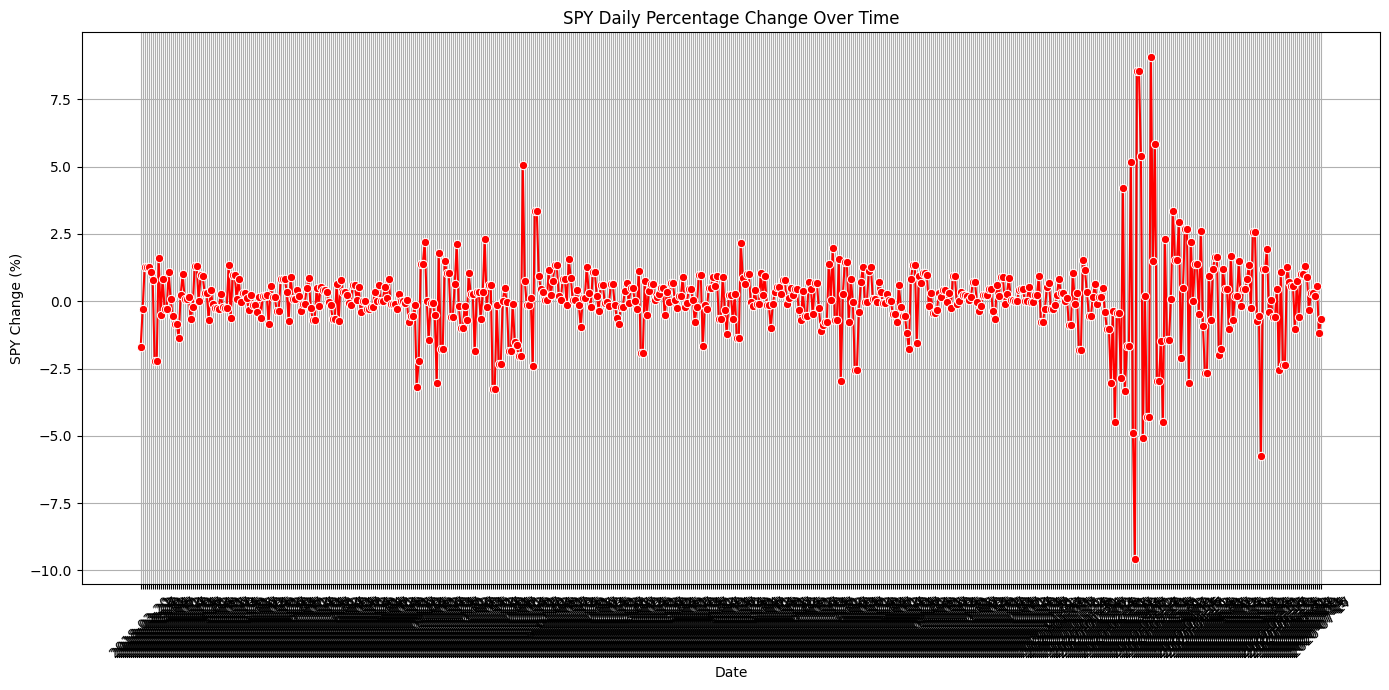

In [8]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_df, x='Date', y='SPY Change', marker='o', color='red')
plt.title('SPY Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('SPY Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 4: Distribution of SPY Changes

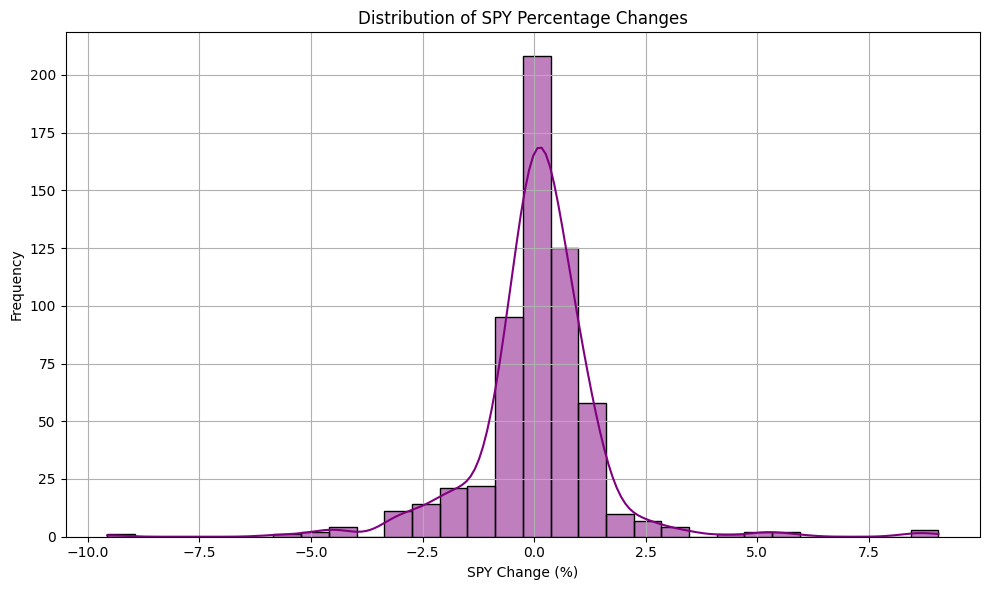

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data_df['SPY Change'], bins=30, kde=True, color='purple')
plt.title('Distribution of SPY Percentage Changes')
plt.xlabel('SPY Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()